In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# IMPORTING DATASET

In [2]:
rounds = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
companies=pd.read_csv("companies.csv", encoding = "ISO-8859-1")
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")

In [3]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
rounds.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
dtype: object

In [5]:
#Rename a column in rounds
rounds.rename(columns = {'company_permalink':'Company_Link'}, inplace = True)

In [6]:
#convert that column to lowercase
rounds['Company_Link'] = rounds['Company_Link'].str.lower()

In [7]:
#Ans-1.1  Unique companies in rounds are
rounds['Company_Link'].nunique()

66370

In [8]:
#printing first five companies of companies dataset
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [9]:
#rename first column of column dataset
companies.rename(columns = {'permalink':'Company_Link'}, inplace = True)

In [10]:
#convert that column to lowercase
companies['Company_Link'] = companies['Company_Link'].str.lower()

In [11]:
#Ans-1.2  Unique companies in companies dataset are
companies['Company_Link'].nunique()

66368

In [12]:
#Ans-1.3 In companies dataset which column use as primary key ,So here in this case company_link is the primary key bcoz total count and unique count of company_link is same
companies['Company_Link'].count()

66368

In [13]:
#checking that all round value is in companies dataset
companies.Company_Link.isin(rounds.Company_Link).astype(int)

0        1
1        1
2        1
3        1
4        1
        ..
66363    1
66364    1
66365    1
66366    1
66367    1
Name: Company_Link, Length: 66368, dtype: int32

In [14]:
#Here we are just storing the first category of category_list in the new variable named as category
companies['category']=companies['category_list'].str.split('|').str[0]

In [15]:
companies.head()

,Company_Link,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,category
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software


In [16]:
#Converting the category_list of companies dataframe to lowercase
companies['category_list'] = companies['category_list'].str.lower()

In [17]:
#finding the countries with english speaking 
eng_speaking = companies.country_code.loc[companies['category_list'].str.contains("english-speaking",na=False, case=True)].value_counts()

In [18]:
#printing the english speaking countries and their count
print(eng_speaking)

USA    2
GBR    2
JPN    2
CHN    2
SGP    1
FRA    1
AUS    1
ARG    1
ISR    1
DEU    1
Name: country_code, dtype: int64


In [19]:
#Removig the category_list column from the companies dataset
companies.drop('category_list', inplace=True, axis=1)

In [20]:
#Inner Join of dataset rounds and companies
master_frame = pd.merge(rounds,companies,on='Company_Link')

In [21]:
master_frame.shape

(114942, 15)

In [22]:
#Ans->1.5 Right Join of dataset rounds and companies
master_frame2 = pd.merge(rounds,companies,on='Company_Link', how='right')

In [23]:
master_frame2.shape

(114947, 15)

In [24]:
(rounds.groupby(['funding_round_type'])['raised_amount_usd'].sum())

funding_round_type
angel                    4.659255e+09
convertible_note         2.103126e+09
debt_financing           1.138848e+11
equity_crowdfunding      6.611162e+08
grant                    9.134424e+09
non_equity_assistance    3.001782e+07
post_ipo_debt            2.564309e+10
post_ipo_equity          5.161061e+10
private_equity           1.419254e+11
product_crowdfunding     5.261686e+08
secondary_market         2.389489e+09
seed                     1.698986e+10
undisclosed              3.044143e+10
venture                  5.901262e+11
Name: raised_amount_usd, dtype: float64

In [25]:
#here we are  grouping of funding round type and calculate the average based on raised_amount_usd
(rounds.groupby(['funding_round_type'])['raised_amount_usd'].sum())/(rounds.groupby(['funding_round_type'])['raised_amount_usd'].count())

funding_round_type
angel                    9.586945e+05
convertible_note         1.453439e+06
debt_financing           1.704353e+07
equity_crowdfunding      5.383682e+05
grant                    4.300576e+06
non_equity_assistance    4.112031e+05
post_ipo_debt            1.687046e+08
post_ipo_equity          8.218249e+07
private_equity           7.330859e+07
product_crowdfunding     1.363131e+06
secondary_market         7.964963e+07
seed                     7.198180e+05
undisclosed              1.924237e+07
venture                  1.174895e+07
Name: raised_amount_usd, dtype: float64

In [26]:
master_frame.head()

,Company_Link,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,status,country_code,state_code,region,city,founded_at,category
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web


In [27]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [28]:
#converting dummy variable to categorical variable and assigning it to category variable
category = pd.get_dummies(mapping).idxmax(1)

In [29]:
mapping.drop(mapping.columns.difference(['category_list']), 1, inplace=True)

C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [30]:
#creating a new column named as category in mapping dataset and assigning it to the category which we have find out previously
mapping['category'] = category

In [31]:
mapping.head()

,category_list,category
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [32]:
#join two dataset master_frame and mapping using inner join and both the table having common column as category
master_frame3 = pd.merge(master_frame,mapping,on='category')

In [33]:
master_frame3.head()

,Company_Link,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,status,country_code,state_code,region,city,founded_at,category,category_list
0,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,1-4 All,NaN,operating,USA,NC,NC - Other,Connellys Springs,NaN,Entertainment,Art
1,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,1-4 All,NaN,operating,USA,NC,NC - Other,Connellys Springs,NaN,Entertainment,Artists Globally
2,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,1-4 All,NaN,operating,USA,NC,NC - Other,Connellys Springs,NaN,Entertainment,Audio
3,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,1-4 All,NaN,operating,USA,NC,NC - Other,Connellys Springs,NaN,Entertainment,Audiobooks
4,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,1-4 All,NaN,operating,USA,NC,NC - Other,Connellys Springs,NaN,Entertainment,Brewing


In [34]:
#this is the number of observation of new dataset which is the common of rounds, companies and mapping dataset.
master_frame3.shape

(121145, 16)

In [35]:
master_frame3.dropna(how='all')     #drop row when all the row elements is null
master_frame3 = master_frame3.dropna(subset=['raised_amount_usd'])       #drop row whose raised_amount_usd is 0
master_frame3.dropna(how='all', axis=1)            #drop column when all records of that column is null

,Company_Link,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,status,country_code,state_code,region,city,founded_at,category,category_list
89,/organization/1-of-99,/funding-round/b5c811f561cfb5701cd5b1762120bbc3,convertible_note,NaN,13-12-2014,100000.0,1 of 99,NaN,operating,USA,CA,SF Bay Area,Mountain View,01-12-2014,Entertainment,Art
90,/organization/1-of-99,/funding-round/b5c811f561cfb5701cd5b1762120bbc3,convertible_note,NaN,13-12-2014,100000.0,1 of 99,NaN,operating,USA,CA,SF Bay Area,Mountain View,01-12-2014,Entertainment,Artists Globally
91,/organization/1-of-99,/funding-round/b5c811f561cfb5701cd5b1762120bbc3,convertible_note,NaN,13-12-2014,100000.0,1 of 99,NaN,operating,USA,CA,SF Bay Area,Mountain View,01-12-2014,Entertainment,Audio
92,/organization/1-of-99,/funding-round/b5c811f561cfb5701cd5b1762120bbc3,convertible_note,NaN,13-12-2014,100000.0,1 of 99,NaN,operating,USA,CA,SF Bay Area,Mountain View,01-12-2014,Entertainment,Audiobooks
93,/organization/1-of-99,/funding-round/b5c811f561cfb5701cd5b1762120bbc3,convertible_note,NaN,13-12-2014,100000.0,1 of 99,NaN,operating,USA,CA,SF Bay Area,Mountain View,01-12-2014,Entertainment,Brewing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121140,/organization/zygo-corporation,/funding-round/d2c6bee0114056f3018667a9b5ab13ba,venture,NaN,24-10-2011,9000000.0,Zygo Corporation,http://www.zygo.com,acquired,USA,CT,CT - Other,Middlefield,NaN,Manufacturing,Mobile Software Tools
121141,/organization/zygo-corporation,/funding-round/d2c6bee0114056f3018667a9b5ab13ba,venture,NaN,24-10-2011,9000000.0,Zygo Corporation,http://www.zygo.com,acquired,USA,CT,CT - Other,Middlefield,NaN,Manufacturing,New Product Development
121142,/organization/zygo-corporation,/funding-round/d2c6bee0114056f3018667a9b5ab13ba,venture,NaN,24-10-2011,9000000.0,Zygo Corporation,http://www.zygo.com,acquired,USA,CT,CT - Other,Middlefield,NaN,Manufacturing,New Technologies
121143,/organization/zygo-corporation,/funding-round/d2c6bee0114056f3018667a9b5ab13ba,venture,NaN,24-10-2011,9000000.0,Zygo Corporation,http://www.zygo.com,acquired,USA,CT,CT - Other,Middlefield,NaN,Manufacturing,Optical Communications


In [36]:
#shape of dataset after removing null values
master_frame3.shape

(88523, 16)

In [37]:
#here we are taking only those records where there is venture, seed, angel and private_equity is present in funding_round_type
master_frame3=master_frame3.loc[master_frame3['funding_round_type'].isin(['venture', 'angel', 'private_equity','seed'])]

In [38]:
#here we are taking only those records where there is venture is present in funding_round_type and assigning it to master_frame3
master_frame3=master_frame3.loc[master_frame3['funding_round_type'].isin(['venture'])]

In [39]:
#Here we see that number of observation reduces after we just set funding round type to venture
master_frame3.shape

(44927, 16)

In [40]:
#Here we are only taking USA,FRA,CHN countries into consideration
array = ['USA', 'FRA','CHN']
master_frame3 = master_frame3.loc[master_frame3['country_code'].isin(array)]

In [41]:
#here we see that now we have only 3 unique countries
master_frame3.country_code.unique()

array(['USA', 'FRA', 'CHN'], dtype=object)

In [42]:
#when we fix the countries then observation are reduced
master_frame3.shape

(34294, 16)

In [43]:
#Count of Company_Link where country_code is USA
master_frame3.loc[master_frame3["country_code"] == "USA"].Company_Link.count()

29799

In [44]:
#Count of Company_Link where country_code is USA
master_frame3.loc[master_frame3["country_code"] == "FRA"].Company_Link.count()

1201

In [45]:
#Count of Company_Link where country_code is USA
master_frame3.loc[master_frame3["country_code"] == "CHN"].Company_Link.count()

3294

In [46]:
#Sum of raised_amount_usd where country_code is USA
master_frame3.loc[master_frame3["country_code"] == "USA"].raised_amount_usd.sum()

272385045129.0

In [47]:
#Sum of raised_amount_usd where country_code is USA
master_frame3.loc[master_frame3["country_code"] == "FRA"].raised_amount_usd.sum()

63213223662.0

In [48]:
#Sum of raised_amount_usd where country_code is USA
master_frame3.loc[master_frame3["country_code"] == "CHN"].raised_amount_usd.sum()

54568836840.0

In [49]:
#Here we are making groups of companies country_code and category wise
master_frame3.groupby('country_code')['category'].value_counts()

country_code  category     
CHN           Manufacturing     2760
              Entertainment      534
FRA           Entertainment      801
              Manufacturing      400
USA           Manufacturing    19920
              Entertainment     9879
Name: category, dtype: int64

In [50]:
#here we are making country wise groups and getting the maximum raised amount country wise
master_frame3.groupby('country_code')['raised_amount_usd'].max()

country_code
CHN    160000000.0
FRA    500000000.0
USA    286000000.0
Name: raised_amount_usd, dtype: float64

In [51]:
master_frame3.head()

,Company_Link,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,status,country_code,state_code,region,city,founded_at,category,category_list
801,/organization/adaptiveblue,/funding-round/75bbd3c5e02f94b47018058d3fe5b65b,venture,C,05-12-2010,6000000.0,AdaptiveBlue,http://tvtag.com/,acquired,USA,NY,New York City,New York,01-01-2007,Entertainment,Art
802,/organization/adaptiveblue,/funding-round/75bbd3c5e02f94b47018058d3fe5b65b,venture,C,05-12-2010,6000000.0,AdaptiveBlue,http://tvtag.com/,acquired,USA,NY,New York City,New York,01-01-2007,Entertainment,Artists Globally
803,/organization/adaptiveblue,/funding-round/75bbd3c5e02f94b47018058d3fe5b65b,venture,C,05-12-2010,6000000.0,AdaptiveBlue,http://tvtag.com/,acquired,USA,NY,New York City,New York,01-01-2007,Entertainment,Audio
804,/organization/adaptiveblue,/funding-round/75bbd3c5e02f94b47018058d3fe5b65b,venture,C,05-12-2010,6000000.0,AdaptiveBlue,http://tvtag.com/,acquired,USA,NY,New York City,New York,01-01-2007,Entertainment,Audiobooks
805,/organization/adaptiveblue,/funding-round/75bbd3c5e02f94b47018058d3fe5b65b,venture,C,05-12-2010,6000000.0,AdaptiveBlue,http://tvtag.com/,acquired,USA,NY,New York City,New York,01-01-2007,Entertainment,Brewing


In [52]:
master_frame.head()

,Company_Link,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,status,country_code,state_code,region,city,founded_at,category
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web


# GRAPHICAL VISUALIZATION 

In [53]:
rounds_1=rounds.groupby('funding_round_type')['raised_amount_usd'].count().reset_index()

In [54]:
rounds_1

,funding_round_type,raised_amount_usd
0,angel,4860
1,convertible_note,1447
2,debt_financing,6682
3,equity_crowdfunding,1228
4,grant,2124
5,non_equity_assistance,73
6,post_ipo_debt,152
7,post_ipo_equity,628
8,private_equity,1936
9,product_crowdfunding,386


In [55]:
rounds_2=rounds_1.sort_values(by="raised_amount_usd",ascending=False).head()

In [56]:
rounds_2

,funding_round_type,raised_amount_usd
13,venture,50228
11,seed,23603
2,debt_financing,6682
0,angel,4860
4,grant,2124


C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


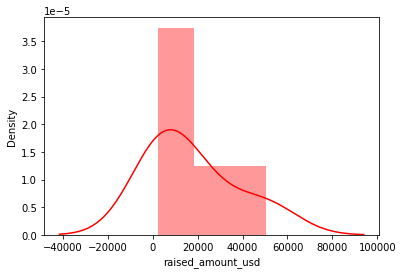

In [57]:
sns.distplot(rounds_2.raised_amount_usd, hist=True,kde=True,color='r')
plt.show()

C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


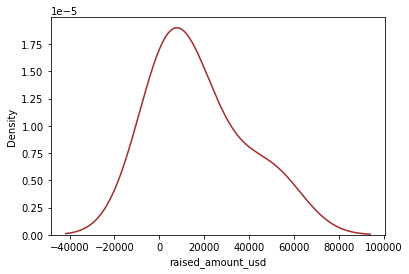

In [58]:
sns.distplot(rounds_2.raised_amount_usd, hist=False,kde=True,color='brown')
plt.show()

<AxesSubplot:xlabel='funding_round_type'>

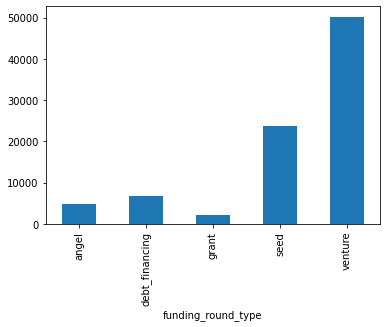

In [59]:
rounds_2.groupby(['funding_round_type'])['raised_amount_usd'].sum().plot.bar()

<AxesSubplot:xlabel='funding_round_type'>

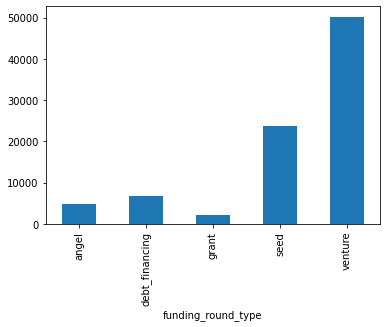

In [78]:
rounds_2.groupby(['funding_round_type'])['raised_amount_usd'].mean().plot.bar()

<AxesSubplot:xlabel='funding_round_type'>

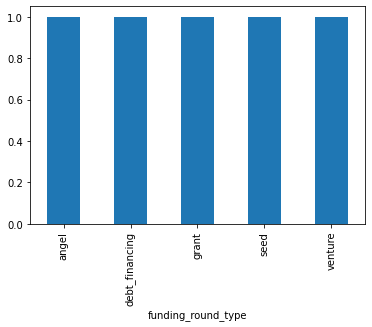

In [60]:
rounds_2.groupby(['funding_round_type'])['raised_amount_usd'].count().plot.bar()

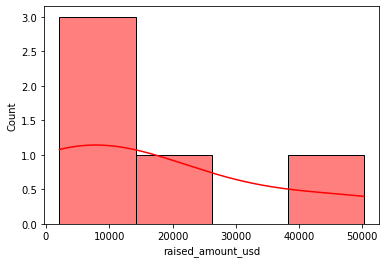

In [76]:
sns.histplot(rounds_2.raised_amount_usd,kde=True,color="red")
plt.show()

C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


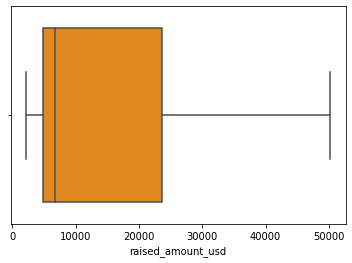

In [62]:
sns.boxplot(rounds_2.raised_amount_usd,color="darkorange")
plt.show()

In [63]:
rounds_3=rounds.groupby('funding_round_code')['raised_amount_usd'].count().reset_index()

In [64]:
rounds_3

,funding_round_code,raised_amount_usd
0,A,12807
1,B,8098
2,C,4220
3,D,1917
4,E,781
5,F,263
6,G,71
7,H,12


In [65]:
rounds_4=rounds_3.sort_values(by="raised_amount_usd",ascending=False).head()

In [66]:
rounds_4

,funding_round_code,raised_amount_usd
0,A,12807
1,B,8098
2,C,4220
3,D,1917
4,E,781


<AxesSubplot:xlabel='funding_round_code'>

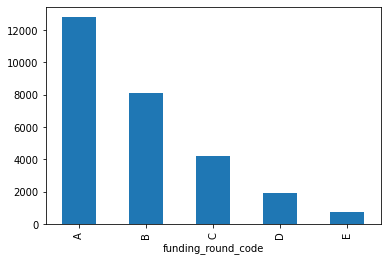

In [67]:
rounds_4.groupby(['funding_round_code'])['raised_amount_usd'].sum().plot.bar()

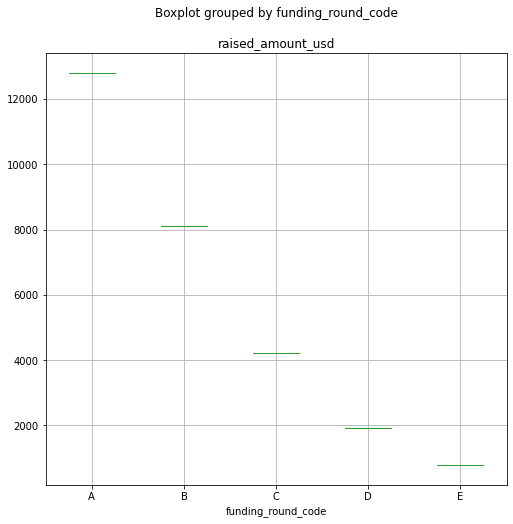

In [68]:
rounds_4.boxplot(column="raised_amount_usd",        
                 by= "funding_round_code",         
                 figsize= (8,8))
plt.show()

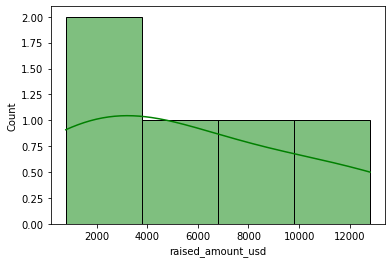

In [69]:
sns.histplot(rounds_4.raised_amount_usd,kde=True,color="g")
plt.show()

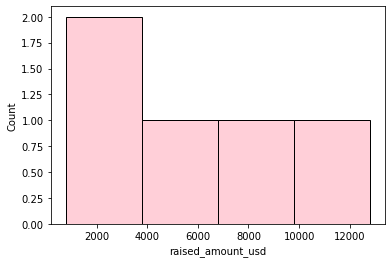

In [70]:
sns.histplot(rounds_4.raised_amount_usd,kde=False,color="pink")
plt.show()

In [71]:
mf_1=master_frame3.groupby('country_code')['raised_amount_usd'].count().reset_index()

In [72]:
mf_1

,country_code,raised_amount_usd
0,CHN,3294
1,FRA,1201
2,USA,29799


<AxesSubplot:xlabel='country_code'>

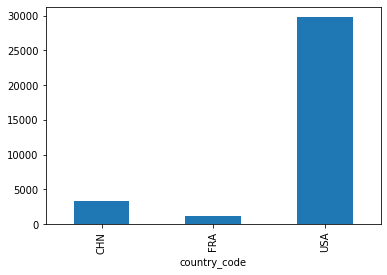

In [73]:
mf_1.groupby(['country_code'])['raised_amount_usd'].sum().plot.bar()

C:\Users\Lenovo\anaconda3\envs\firstEnv\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


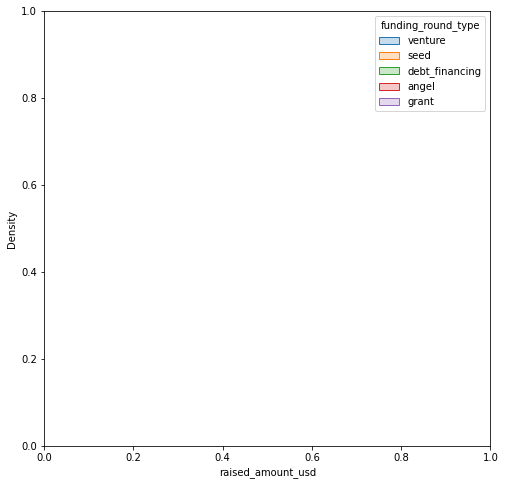

In [74]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=rounds_2,x="raised_amount_usd",hue="funding_round_type",fill=True)
plt.show()